## Description

### Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

 

### Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

 

### Data Description

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

## Data Dictionary

* S.No.: Serial number
* Name: Name of the car which includes brand name and model name
* Location: Location in which the car is being sold or is available for purchase (cities)
* Year: Manufacturing year of the car
* Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
* Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* Transmission: The type of transmission used by the car (Automatic/Manual)
* Owner: Type of ownership
* Mileage: The standard mileage offered by the car company in kmpl or km/kg
* Engine: The displacement volume of the engine in CC
* Power: The maximum power of the engine in bhp
* Seats: The number of seats in the car
* New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
* Price: The price of the used car in INR Lakhs

In [1]:
# this will help in making the Python code more structured automatically
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

#### Loading dataframe from csv file

In [2]:
# loading the dataframe for user cars data
df = pd.read_csv("used_cars_data.csv")

<IPython.core.display.Javascript object>

#### Checking shape and random sample data from Dataframe

In [3]:
# checking shape of the dataframe
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# checking 10 random sample data
np.random.seed(1)
df.sample(n=10)

There are 7253 rows and 14 columns.


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


<IPython.core.display.Javascript object>

* **Mileage**, **Engine**, **Power** has extra text value. We have to convert it into float datatype.
* **New_Price** has extra text value and also has lots of missing value.

#### Checking data types of the columns in the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [6]:
df.duplicated().sum()  # checking for duplicate data in dataframe

0

<IPython.core.display.Javascript object>

#### Removing the S.NO. column because it does not have impact on any column

In [7]:
df.drop(["S.No."], axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Converting 'Mileage', 'Engine', 'Power' & 'New_Price' columns from object to float

In [8]:
# converting 'Mileage', 'Engine', 'Power' column data
def convert_to_num(pos_val):
    """For each value, take the number before the ' '
    unless it is not a string value. This will only happen
    for NaNs so in that case we just return NaN.
    """
    if isinstance(pos_val, str):
        return float(pos_val.split(" ")[0])
    else:
        return np.nan


pos_cols = ["Mileage", "Engine", "Power"]

for colname in pos_cols:
    df[colname] = df[colname].apply(convert_to_num)

<IPython.core.display.Javascript object>

In [9]:
# converting 'New_Price' column data
def convert_new_price(pos_val):
    if isinstance(pos_val, str):
        val = float(pos_val.split(" ")[0])
        if pos_val.split(" ")[1].lower() == "cr":
            val = val * 100
        return val
    else:
        return np.nan


df["New_Price"] = df["New_Price"].apply(convert_new_price)

<IPython.core.display.Javascript object>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


<IPython.core.display.Javascript object>

In [11]:
df.sample(20)  # checking sample data from dataframe

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2245,Maruti Wagon R VXI 1.2,Mumbai,2015,55000,Petrol,Manual,First,21.50,1197.0,81.80,5.0,5.88,3.10
6407,Maruti Swift LXI Option,Kochi,2017,62889,Petrol,Manual,First,20.40,1197.0,81.80,5.0,NaN,NaN
1226,Toyota Corolla Altis 1.8 VL CVT,Delhi,2017,21000,Petrol,Automatic,First,14.28,1798.0,138.03,5.0,23.25,18.00
533,Honda City 1.5 V AT,Mumbai,2010,69000,Petrol,Automatic,Second,16.80,1497.0,118.00,5.0,NaN,2.85
6330,Hyundai i20 Asta 1.2,Kolkata,2015,33000,Petrol,Manual,First,18.60,1197.0,81.83,5.0,NaN,NaN
5931,Maruti Ertiga VXI,Mumbai,2012,52500,Petrol,Manual,Second,16.02,1373.0,93.70,7.0,NaN,5.25
2784,Nissan Micra Diesel XV,Hyderabad,2011,86732,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,3.60
5180,Skoda Superb Elegance 1.8 TSI AT,Bangalore,2009,75000,Petrol,Automatic,Second,13.70,1798.0,157.75,5.0,NaN,4.95
2722,Volkswagen Ameo 1.5 TDI Highline,Kochi,2018,31426,Diesel,Manual,First,21.66,1498.0,108.62,5.0,9.72,7.90
5322,Hyundai Grand i10 CRDi Sportz,Ahmedabad,2016,30000,Diesel,Manual,First,24.00,1120.0,70.00,5.0,NaN,5.50


<IPython.core.display.Javascript object>

#### Checking for no. of missing values in the columns

In [12]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

<IPython.core.display.Javascript object>

#### Finding a logic to update missing values

In [13]:
# getting list of cars name that has missing Power value
name_power = df[df.Power.isnull()]["Name"].unique()
name_power

array(['Ford Fiesta 1.4 SXi TDCi', 'Hyundai Santro Xing XL',
       'Hyundai Santro Xing XO', 'Hyundai Santro Xing XL eRLX Euro III',
       'Hyundai Santro Xing XO eRLX Euro II', 'Honda City 1.5 GXI',
       'Maruti Swift 1.3 VXi', 'Maruti Swift VDI BSIV',
       'Volkswagen Jetta 2007-2011 1.9 L TDI',
       'Hyundai Santro GLS I - Euro I', 'Ford Fiesta 1.6 SXI ABS Duratec',
       'Hyundai Santro LS zipPlus', 'Hyundai Santro Xing XP',
       'Tata Indica DLS', 'Land Rover Range Rover 3.0 D',
       'Toyota Etios Liva G', 'Smart Fortwo CDI AT',
       'Porsche Cayman 2009-2012 S', 'Toyota Etios GD',
       'Toyota Etios Liva GD', 'Hyundai Santro GLS I - Euro II',
       'Honda City 1.3 DX', 'Fiat Petra 1.2 EL', 'Maruti Swift 1.3 ZXI',
       'Maruti Baleno Vxi',
       'Land Rover Range Rover Sport 2005 2012 Sport',
       'Chevrolet Optra 1.6 Elite', 'Mahindra Bolero ZLX',
       'Nissan Micra Diesel', 'Hyundai Santro DX',
       'Mercedes-Benz E-Class 220 CDI', 'Mahindra Jeep MM 55

<IPython.core.display.Javascript object>

In [14]:
# getting list of cars name that has Power value
df_power = df[df.Power.notnull()]
df_power

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN


<IPython.core.display.Javascript object>

In [15]:
# now checking if we can find missing car power list from car power list
df_power[df_power.Name.isin(name_power)].Name.value_counts()

Maruti Swift VDI BSIV        25
Mahindra Bolero ZLX           8
Toyota Etios Liva GD          4
Toyota Etios Liva G           3
Honda City 1.5 GXI            2
Toyota Etios GD               2
Honda Jazz Select Edition     1
Toyota Etios Liva V           1
Name: Name, dtype: int64

<IPython.core.display.Javascript object>

In [16]:
# we found lots of value, just validate for "Toyota Etios Liva GD" data
df[df.Name == "Toyota Etios Liva GD"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
556,Toyota Etios Liva GD,Chennai,2013,179000,Diesel,Manual,First,23.59,1364.0,67.04,5.0,NaN,3.80
1068,Toyota Etios Liva GD,Pune,2012,225000,Diesel,Manual,Second,23.59,1364.0,NaN,5.0,NaN,2.60
1649,Toyota Etios Liva GD,Pune,2011,32000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,3.85
3307,Toyota Etios Liva GD,Delhi,2013,64000,Diesel,Manual,First,23.59,1364.0,67.06,5.0,NaN,3.10
3781,Toyota Etios Liva GD,Coimbatore,2015,49894,Diesel,Manual,First,23.59,1364.0,67.06,5.0,NaN,5.27
3932,Toyota Etios Liva GD,Delhi,2014,63000,Diesel,Manual,First,23.59,1364.0,67.04,5.0,NaN,4.35
4080,Toyota Etios Liva GD,Mumbai,2011,74000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,3.60
4354,Toyota Etios Liva GD,Delhi,2012,72351,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,2.65
4954,Toyota Etios Liva GD,Coimbatore,2013,62601,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,4.67
6022,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,NaN


<IPython.core.display.Javascript object>

We can find missing value from same type of cars. We can do the same logic for "Mileage", "Engine", "Power", "Seats" & "New_Price". We can update with median of same type of cars.

In [17]:
df[["Mileage", "Engine", "Power", "Seats", "New_Price"]] = df.groupby(["Name"])[
    ["Mileage", "Engine", "Power", "Seats", "New_Price"]
].transform(lambda x: x.fillna(x.median()))
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 40
Power                 136
Seats                  46
New_Price            6020
Price                1234
dtype: int64

<IPython.core.display.Javascript object>

Lots of missing values updated.

In [18]:
# Now checking value counts for each category columns
cat_col = ["Name", "Location", "Fuel_Type", "Transmission", "Owner_Type"]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(dropna=False))
    print("-" * 50)

Mahindra XUV500 W8 2WD                   55
Maruti Swift VDI                         49
Maruti Swift Dzire VDI                   42
Honda City 1.5 S MT                      39
Maruti Swift VDI BSIV                    37
                                         ..
Ford EcoSport 1.5 Ti VCT MT Signature     1
Maruti A-Star Zxi                         1
Honda CR-V 2.4L 4WD MT                    1
Maruti Vitara Brezza ZDi Plus AMT         1
Mahindra Bolero SLE                       1
Name: Name, Length: 2041, dtype: int64
--------------------------------------------------
Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
---------------------------------

<IPython.core.display.Javascript object>

Name column has 2041 unique values, we will create car manufacturer from car names. It will reduce the unique counts.

In [19]:
df["Name_Manufacturer"] = df["Name"].apply(lambda x: x.split(" ")[0].strip().title())

<IPython.core.display.Javascript object>

In [20]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Manufacturer
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.610,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.215,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi


<IPython.core.display.Javascript object>

In [21]:
df["Name_Manufacturer"].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
Bmw               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Opelcorsa           1
Hindustan           1
Lamborghini         1
Smart               1
Ambassador          1
Name: Name_Manufacturer, dtype: int64

<IPython.core.display.Javascript object>

Updating car manufacturer name of 'Land' and 'Mini'

In [22]:
df["Name_Manufacturer"] = df.Name_Manufacturer.str.replace("Land", "Land Rover")

<IPython.core.display.Javascript object>

In [23]:
df["Name_Manufacturer"] = df.Name_Manufacturer.str.replace("Mini", "Mini Cooper")

<IPython.core.display.Javascript object>

In [24]:
df["Name_Manufacturer"].value_counts()  # checking value counts for Name_Manufacturer

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
Bmw               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Hindustan           1
Opelcorsa           1
Smart               1
Lamborghini         1
Ambassador          1
Name: Name_Manufacturer, dtype: int64

<IPython.core.display.Javascript object>

In [25]:
df.info()  # checking dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7213 non-null   float64
 9   Power              7117 non-null   float64
 10  Seats              7207 non-null   float64
 11  New_Price          1233 non-null   float64
 12  Price              6019 non-null   float64
 13  Name_Manufacturer  7253 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

## Data visualization

### Univariate Plot

In [26]:
# Univariate analysis of numerical variables to study their central tendency and dispersion.
# Write a function that will help us create a boxplot and a histogram for any input numerical variable.
# Function takes the numerical column as the input and returns the column describe, boxplots and histograms for the variable.


def univariate_num_plot(feature, figsize=(10, 8), bins=10):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    print(feature.describe())
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        x=feature, ax=ax_box2, showmeans=True
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        x=feature, kde=False, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        x=feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="red", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### Checking for Year

count    7253.000000
mean     2013.365366
std         3.254421
min      1996.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64


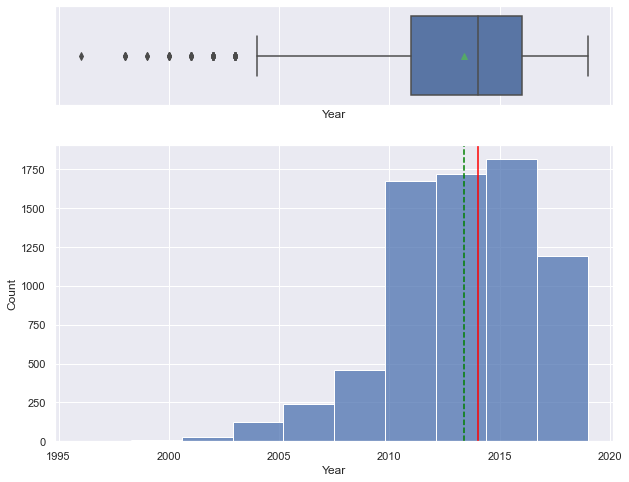

<IPython.core.display.Javascript object>

In [27]:
univariate_num_plot(df["Year"])

**Year** data is looking good. Also has very few outlier.

#### Checking for Kilometers_Driven

count    7.253000e+03
mean     5.869906e+04
std      8.442772e+04
min      1.710000e+02
25%      3.400000e+04
50%      5.341600e+04
75%      7.300000e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64


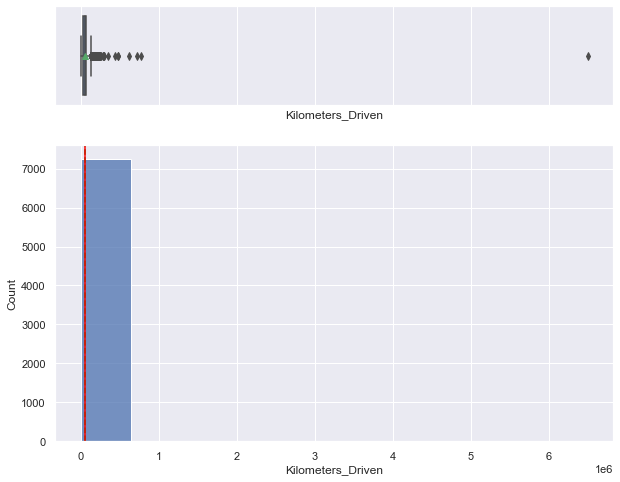

<IPython.core.display.Javascript object>

In [28]:
univariate_num_plot(df["Kilometers_Driven"])

The distribution of **Kilometers_Driven** is heavily right-skewed with a median is around 53416 KM.

#### Checking for Mileage

count    7251.000000
mean       18.141580
std         4.562197
min         0.000000
25%        15.170000
50%        18.160000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64


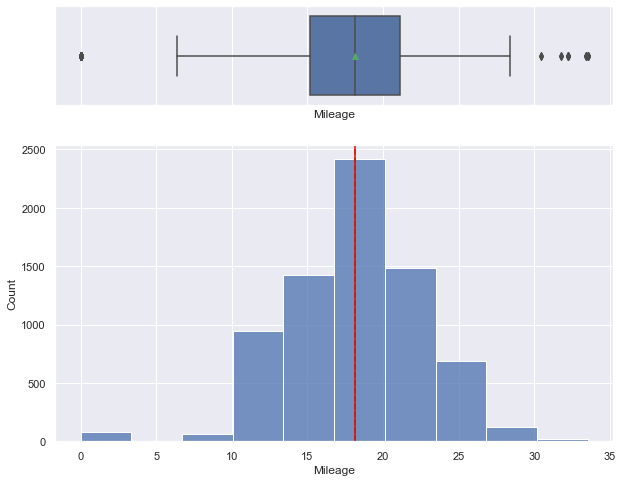

<IPython.core.display.Javascript object>

In [29]:
univariate_num_plot(df["Mileage"])

**Mileage** data is looking good. Also has very few outlier.

#### Checking for Engine

count    7213.000000
mean     1616.347706
std       595.104189
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1968.000000
max      5998.000000
Name: Engine, dtype: float64


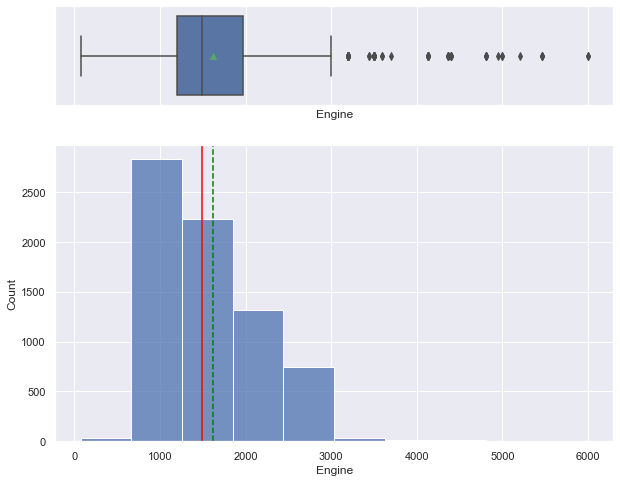

<IPython.core.display.Javascript object>

In [30]:
univariate_num_plot(df["Engine"])

The distribution of **Engine** is right-skewed. Also has very few outlier.

#### Checking for Power

count    7117.000000
mean      112.552661
std        53.427916
min        34.200000
25%        75.000000
50%        94.000000
75%       138.100000
max       616.000000
Name: Power, dtype: float64


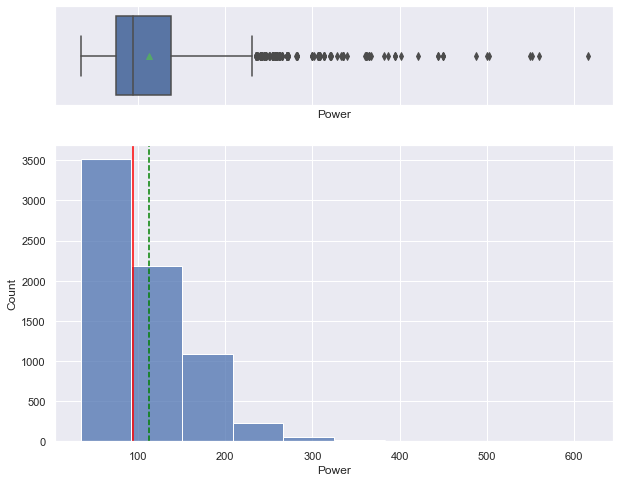

<IPython.core.display.Javascript object>

In [31]:
univariate_num_plot(df["Power"])

The distribution of **Power** is right-skewed. Also has outlier.

#### Checking for Seats

count    7207.000000
mean        5.279451
std         0.811312
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64


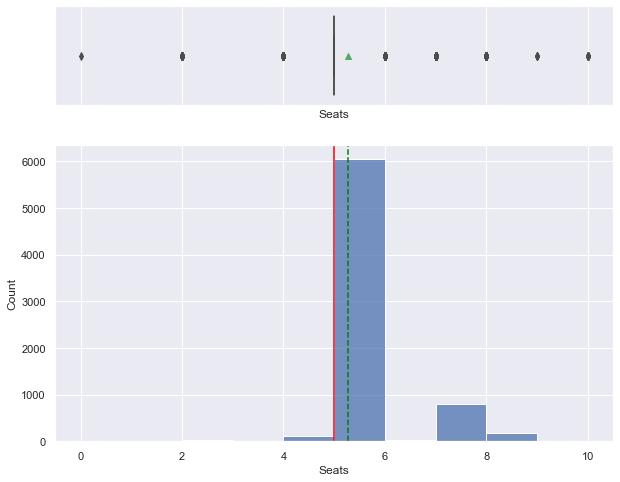

<IPython.core.display.Javascript object>

In [32]:
univariate_num_plot(df["Seats"])

**Seats** data is looking good. Maximum data in 1st quartile to the 3rd quartile.

#### Checking for New_Price

count    1233.000000
mean       21.233727
std        25.878573
min         3.910000
25%         7.920000
50%        11.270000
75%        22.950000
max       375.000000
Name: New_Price, dtype: float64


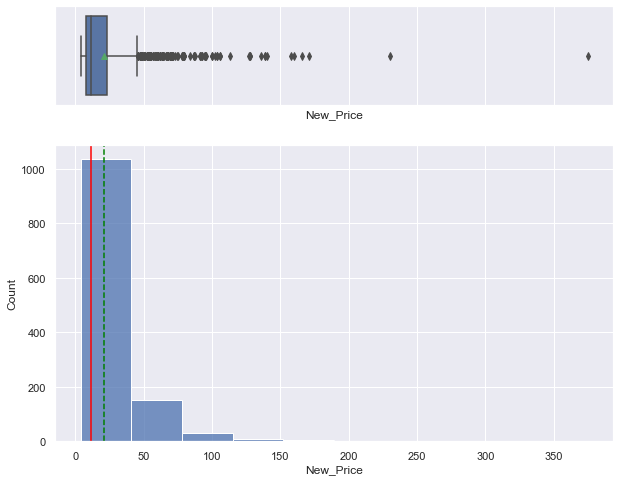

<IPython.core.display.Javascript object>

In [33]:
univariate_num_plot(df["New_Price"])

The distribution of **New_Price** is right-skewed. Also has so many outlier.

#### Checking for Price

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64


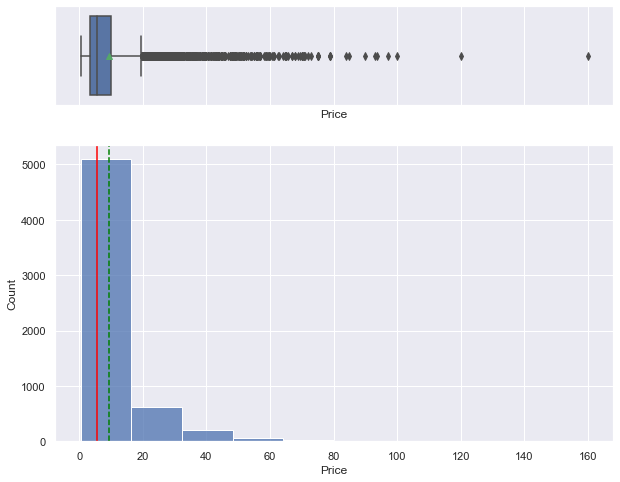

<IPython.core.display.Javascript object>

In [34]:
univariate_num_plot(df["Price"])

The distribution of **Price** is right-skewed. Also has so many outlier.

### Log transformation of heavily right-skewed distribution

In [35]:
df["Kilometers_Driven_log"] = np.log(df["Kilometers_Driven"] + 1)

<IPython.core.display.Javascript object>

count    7253.000000
mean       10.761010
std         0.716276
min         5.147494
25%        10.434145
50%        10.885884
75%        11.198228
max        15.687313
Name: Kilometers_Driven_log, dtype: float64


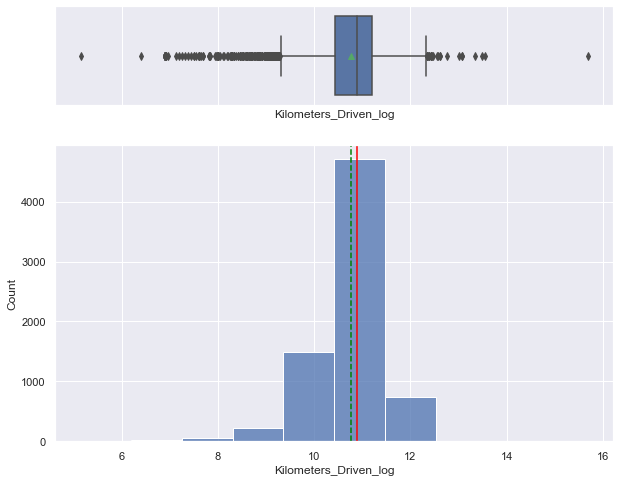

<IPython.core.display.Javascript object>

In [36]:
univariate_num_plot(df["Kilometers_Driven_log"])

In [37]:
df.drop(
    "Kilometers_Driven", axis=1, inplace=True
)  # Now data is distributed evenly we can drop the actual column

<IPython.core.display.Javascript object>

In [38]:
# Function to create barplots that indicate percentage for each category.


def univariate_cat_plot(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(x=data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

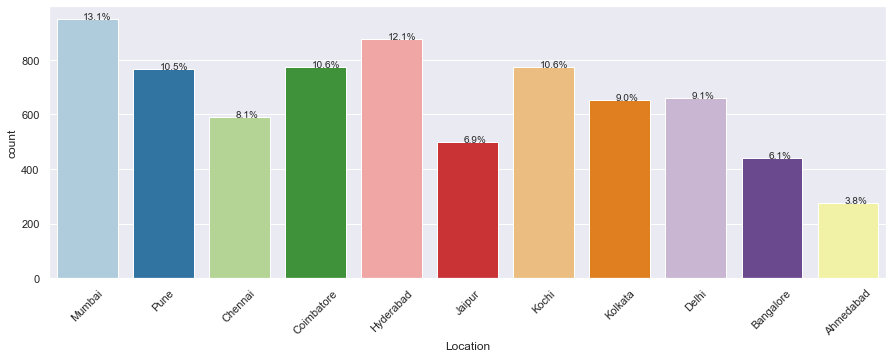

<IPython.core.display.Javascript object>

In [39]:
univariate_cat_plot(df, "Location")

Most selling cars from Mumbai

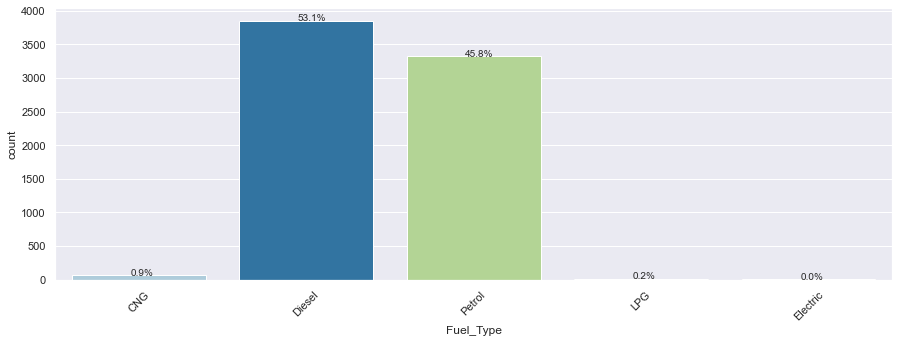

<IPython.core.display.Javascript object>

In [40]:
univariate_cat_plot(df, "Fuel_Type")

99% cars are Diesel and Petrol

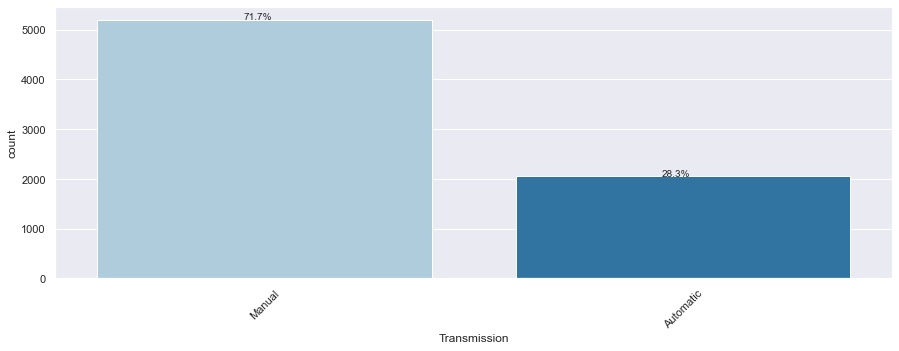

<IPython.core.display.Javascript object>

In [41]:
univariate_cat_plot(df, "Transmission")

Maximum cars are Manual Transmission

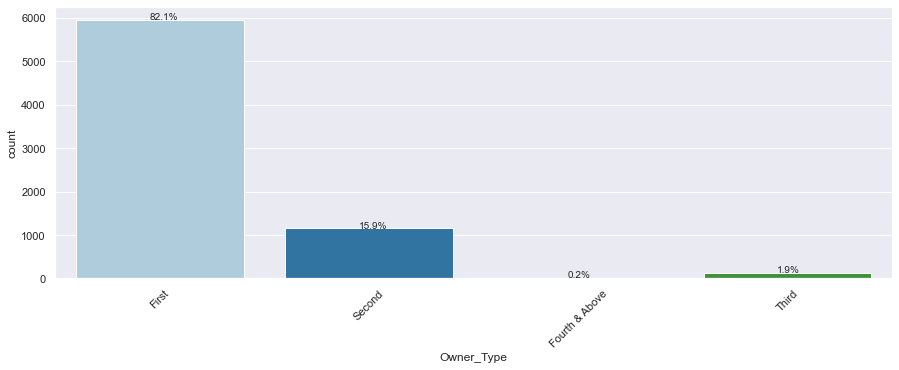

<IPython.core.display.Javascript object>

In [42]:
univariate_cat_plot(df, "Owner_Type")

First owner selling 82% of cars.

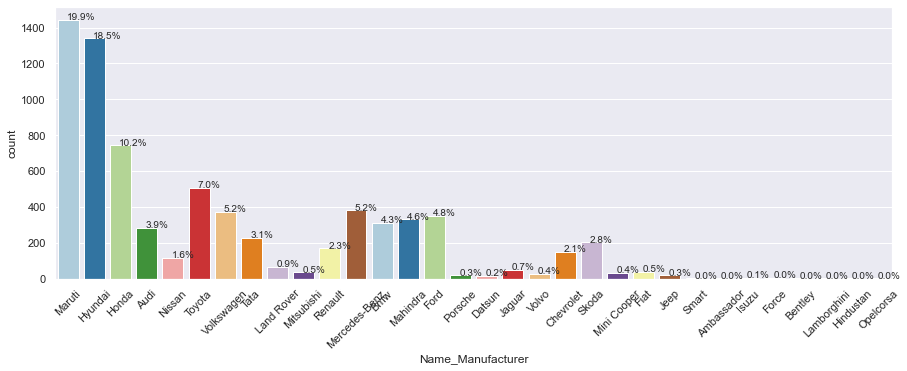

<IPython.core.display.Javascript object>

In [43]:
univariate_cat_plot(df, "Name_Manufacturer")

approx 50% Cars selling by 'Maruti', 'Hyundai' & 'Honda'

### Bivariate Analysis

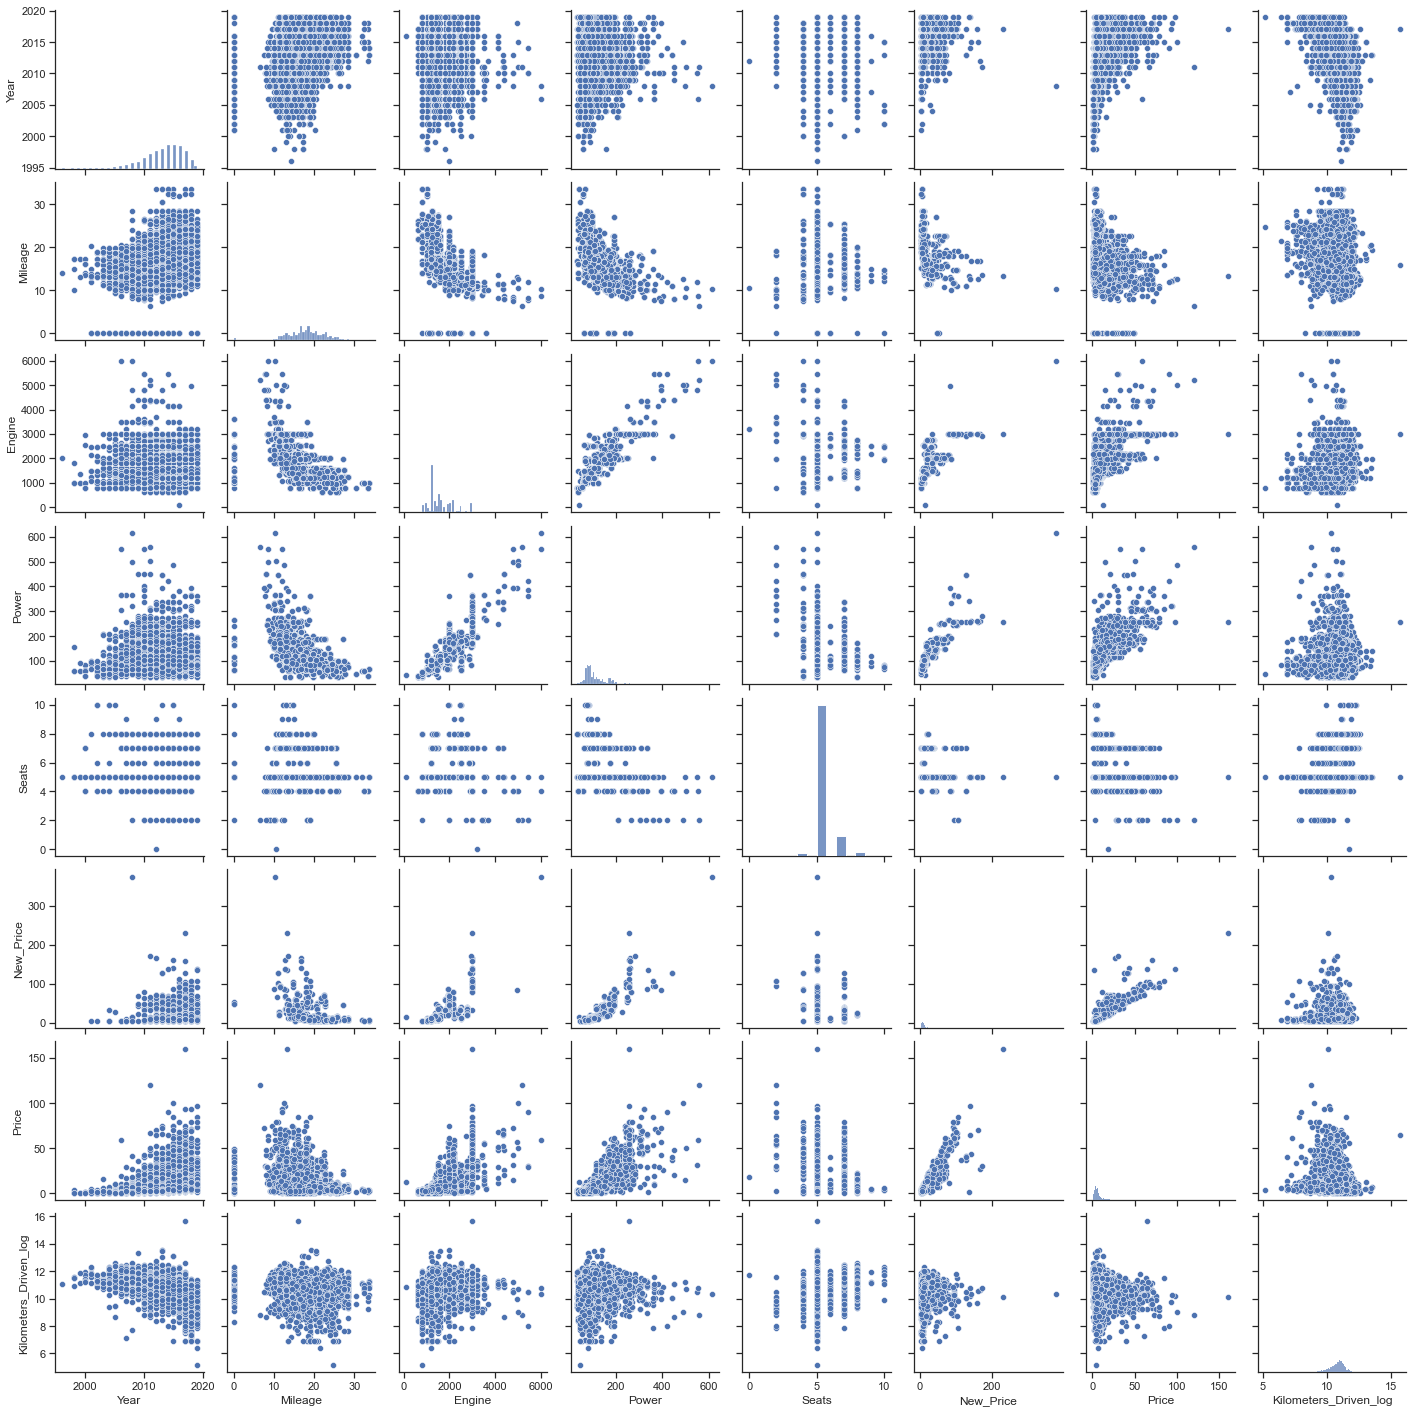

<IPython.core.display.Javascript object>

In [44]:
# using pairplot to understand the correlation of all the numerical columns.
sns.set_theme(style="ticks")
sns.pairplot(data=df)

### Heat map

<AxesSubplot:>

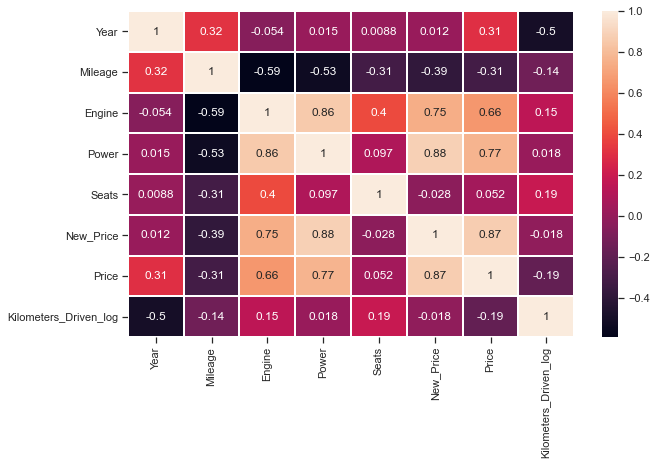

<IPython.core.display.Javascript object>

In [45]:
plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, linewidths=1)

### Key observations of numerical variables

* **Mileage** - It has little correlated with **Year**. It has good -ve correlated with **Engine** and **Power**.
* **Engine** - It has highly correlated with **New_Price**, **Price** and **Power**. It has good -ve correlated with **Mileage**.
* **Power** - It has highly correlated with **New_Price**, **Price** and **Engine**. It has good -ve correlated with **Mileage**.
* **New_Price** - It has highly correlated with **Engine**, **Power** and **Price**.
* **Price** - It has highly correlated with **Engine**, **Power** and **New_Price**.

<AxesSubplot:xlabel='Location', ylabel='count'>

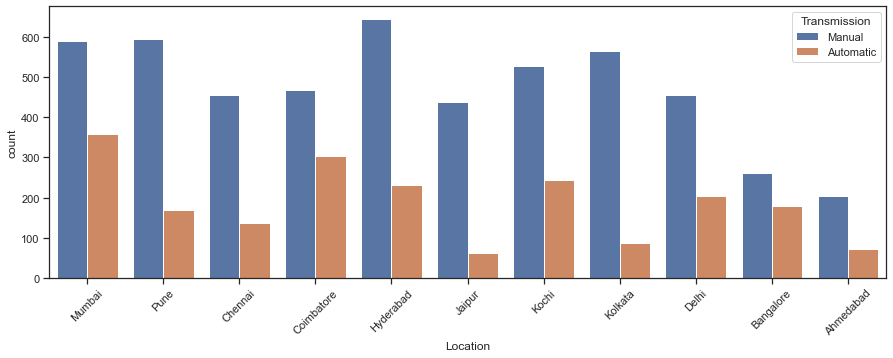

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
sns.countplot(data=df, x="Location", hue="Transmission")

<AxesSubplot:xlabel='Location', ylabel='count'>

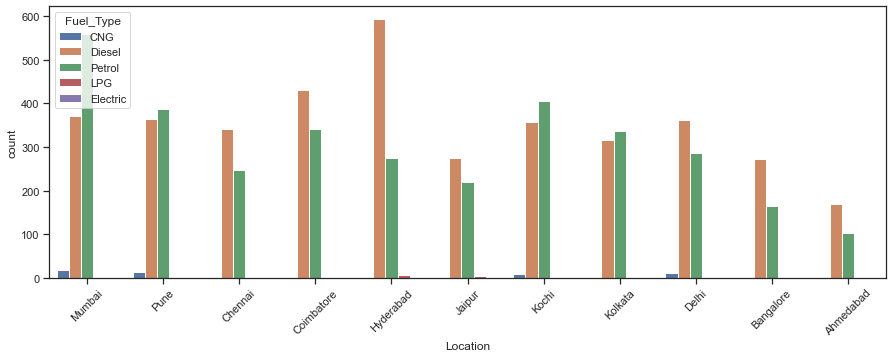

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
sns.countplot(data=df, x="Location", hue="Fuel_Type")

Hyderabad people using Diesel and Mumbai people using Petrol more

<AxesSubplot:xlabel='Owner_Type', ylabel='count'>

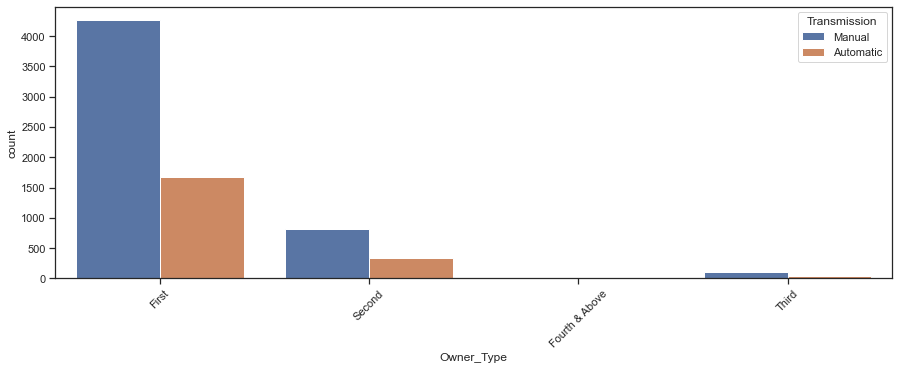

<IPython.core.display.Javascript object>

In [48]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
sns.countplot(data=df, x="Owner_Type", hue="Transmission")

<AxesSubplot:xlabel='Owner_Type', ylabel='count'>

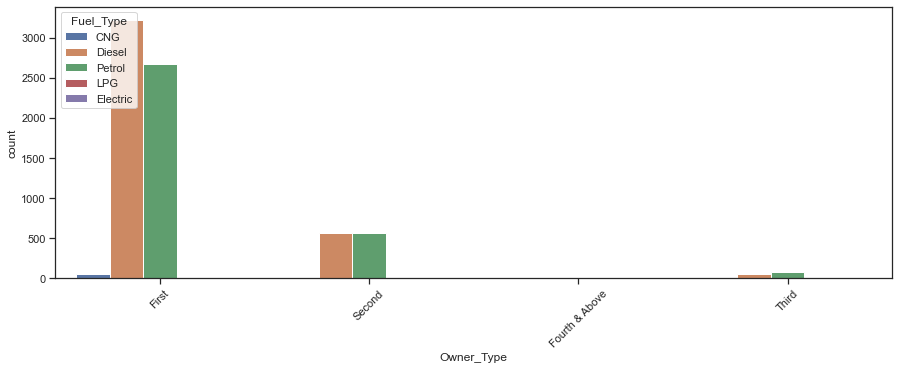

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
sns.countplot(data=df, x="Owner_Type", hue="Fuel_Type")

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

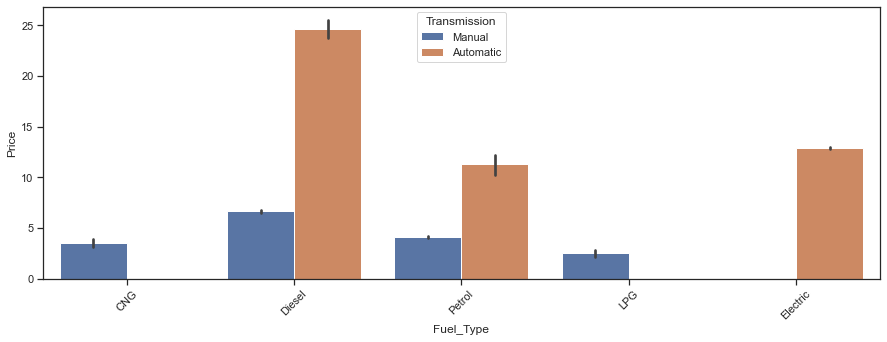

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
sns.barplot(data=df, x="Fuel_Type", y="Price", hue="Transmission")

Diesel car price more than other fuel type car

<AxesSubplot:xlabel='Name_Manufacturer', ylabel='Price'>

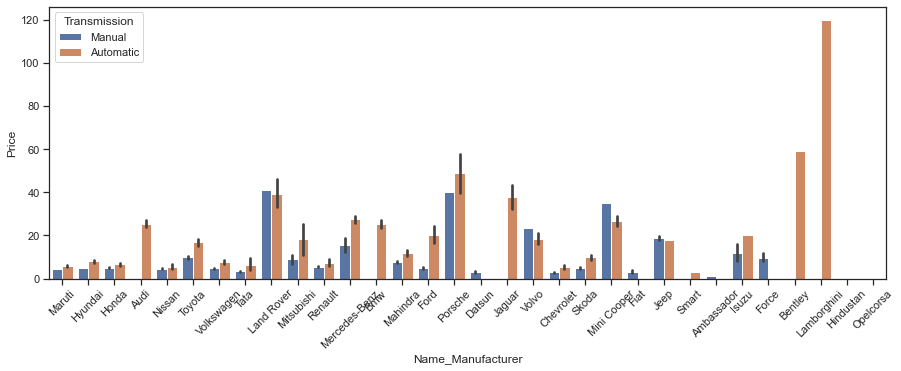

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
sns.barplot(data=df, x="Name_Manufacturer", y="Price", hue="Transmission")

<AxesSubplot:xlabel='Seats', ylabel='count'>

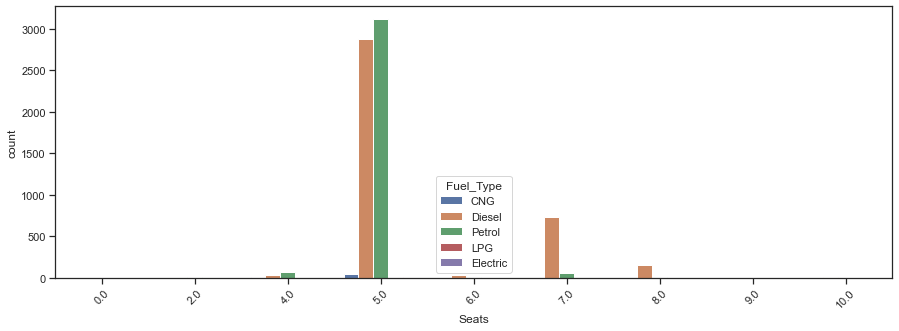

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
sns.countplot(data=df, x="Seats", hue="Fuel_Type")

5 seater cars are selling more

<AxesSubplot:xlabel='Seats', ylabel='Price'>

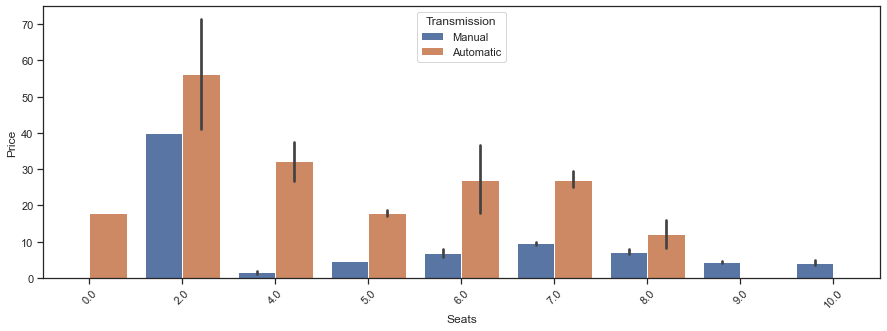

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
sns.barplot(data=df, x="Seats", y="Price", hue="Transmission")

2 seater car has more price

## Data preprocessing

In [54]:
df_pre = df.copy()  # Copy dataframe for Data preperation

<IPython.core.display.Javascript object>

In [55]:
df_pre.drop(
    ["Name", "New_Price"], axis=1, inplace=True
)  # remove 'Name' for so many unique values and 'New_Price' for so many missing data

<IPython.core.display.Javascript object>

In [56]:
df_pre.dropna(
    subset=["Price"], inplace=True
)  # remove row which has missing 'Price', we can't build model on artificial price

<IPython.core.display.Javascript object>

In [57]:
# let us reset the dataframe index
df_pre.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [58]:
df_pre.isnull().sum()  # checking no. of missing values left in the columns

Location                   0
Year                       0
Fuel_Type                  0
Transmission               0
Owner_Type                 0
Mileage                    2
Engine                    31
Power                    113
Seats                     36
Price                      0
Name_Manufacturer          0
Kilometers_Driven_log      0
dtype: int64

<IPython.core.display.Javascript object>

In [59]:
df_pre.dropna(inplace=True)  # drop remaining missing values rows.
df_pre.isnull().sum()

Location                 0
Year                     0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Price                    0
Name_Manufacturer        0
Kilometers_Driven_log    0
dtype: int64

<IPython.core.display.Javascript object>

In [60]:
df_pre.describe(include="all").T  # checking final dataframe

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,5903,11,Mumbai,777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5903.0,NaN,NaN,NaN,2013.464679,3.169139,1998.0,2012.0,2014.0,2016.0,2019.0
Fuel_Type,5903,4,Diesel,3175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5903,2,Manual,4201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5903,4,First,4861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5903.0,NaN,NaN,NaN,18.275616,4.3807,0.0,15.29,18.2,21.1,33.54
Engine,5903.0,NaN,NaN,NaN,1624.325597,600.613013,624.0,1198.0,1495.0,1984.0,5998.0
Power,5903.0,NaN,NaN,NaN,113.078277,53.81536,34.2,75.0,94.0,138.1,560.0
Seats,5903.0,NaN,NaN,NaN,5.282568,0.803529,2.0,5.0,5.0,5.0,10.0
Price,5903.0,NaN,NaN,NaN,9.573054,11.228361,0.44,3.5,5.7,10.0,160.0


<IPython.core.display.Javascript object>

In [61]:
# checking shape of the dataframe
print(f"There are {df_pre.shape[0]} rows and {df_pre.shape[1]} columns.")

There are 5903 rows and 12 columns.


<IPython.core.display.Javascript object>

In [62]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5903 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               5903 non-null   object 
 1   Year                   5903 non-null   int64  
 2   Fuel_Type              5903 non-null   object 
 3   Transmission           5903 non-null   object 
 4   Owner_Type             5903 non-null   object 
 5   Mileage                5903 non-null   float64
 6   Engine                 5903 non-null   float64
 7   Power                  5903 non-null   float64
 8   Seats                  5903 non-null   float64
 9   Price                  5903 non-null   float64
 10  Name_Manufacturer      5903 non-null   object 
 11  Kilometers_Driven_log  5903 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 599.5+ KB


<IPython.core.display.Javascript object>

<AxesSubplot:>

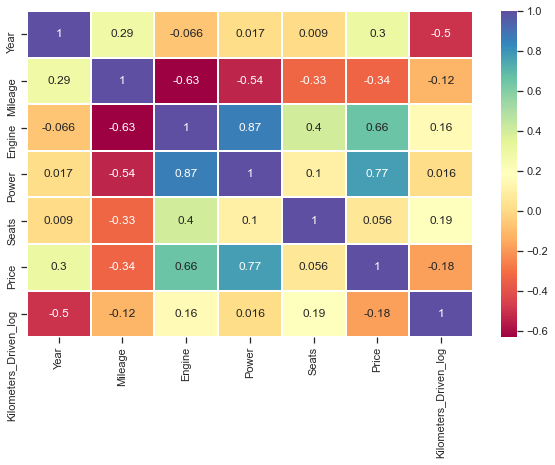

<IPython.core.display.Javascript object>

In [63]:
plt.subplots(figsize=(10, 6))
sns.heatmap(df_pre.corr(), annot=True, linewidths=1, cmap="Spectral")

## Model Building

### Define dependent and independent variables

In [64]:
ind_vars = df_pre.drop(["Price"], axis=1)
dep_var = df_pre[["Price"]]

<IPython.core.display.Javascript object>

### Adding dummy variables for category columns

In [65]:
cat_columns = ind_vars.select_dtypes(exclude=np.number).columns
cat_columns

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Name_Manufacturer'],
      dtype='object')

<IPython.core.display.Javascript object>

In [66]:
ind_vars = pd.get_dummies(
    ind_vars,
    columns=[
        "Location",
        "Fuel_Type",
        "Transmission",
        "Owner_Type",
        "Name_Manufacturer",
    ],
    drop_first=True,
)
ind_vars.head()

,Year,Mileage,Engine,Power,Seats,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Name_Manufacturer_Audi,Name_Manufacturer_Bentley,Name_Manufacturer_Bmw,Name_Manufacturer_Chevrolet,Name_Manufacturer_Datsun,Name_Manufacturer_Fiat,Name_Manufacturer_Force,Name_Manufacturer_Ford,Name_Manufacturer_Honda,Name_Manufacturer_Hyundai,Name_Manufacturer_Isuzu,Name_Manufacturer_Jaguar,Name_Manufacturer_Jeep,Name_Manufacturer_Lamborghini,Name_Manufacturer_Land Rover,Name_Manufacturer_Mahindra,Name_Manufacturer_Maruti,Name_Manufacturer_Mercedes-Benz,Name_Manufacturer_Mini Cooper,Name_Manufacturer_Mitsubishi,Name_Manufacturer_Nissan,Name_Manufacturer_Porsche,Name_Manufacturer_Renault,Name_Manufacturer_Skoda,Name_Manufacturer_Tata,Name_Manufacturer_Toyota,Name_Manufacturer_Volkswagen,Name_Manufacturer_Volvo
0,2010,26.60,998.0,58.16,5.0,11.184435,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2015,19.67,1582.0,126.20,5.0,10.621352,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,18.20,1199.0,88.70,5.0,10.736418,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,20.77,1248.0,88.76,7.0,11.373675,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2013,15.20,1968.0,140.80,5.0,10.613271,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [67]:
ind_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5903 entries, 0 to 6018
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             5903 non-null   int64  
 1   Mileage                          5903 non-null   float64
 2   Engine                           5903 non-null   float64
 3   Power                            5903 non-null   float64
 4   Seats                            5903 non-null   float64
 5   Kilometers_Driven_log            5903 non-null   float64
 6   Location_Bangalore               5903 non-null   uint8  
 7   Location_Chennai                 5903 non-null   uint8  
 8   Location_Coimbatore              5903 non-null   uint8  
 9   Location_Delhi                   5903 non-null   uint8  
 10  Location_Hyderabad               5903 non-null   uint8  
 11  Location_Jaipur                  5903 non-null   uint8  
 12  Location_Kochi      

<IPython.core.display.Javascript object>

In [68]:
# checking shape of the dataframe
print(f"There are {ind_vars.shape[0]} rows and {ind_vars.shape[1]} columns.")

There are 5903 rows and 51 columns.


<IPython.core.display.Javascript object>

### Prepare testing and training data

In [69]:
x_train, x_test, y_train, y_test = train_test_split(
    ind_vars, dep_var, test_size=0.3, random_state=1
)

<IPython.core.display.Javascript object>

In [70]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4132
Number of rows in test data = 1771


<IPython.core.display.Javascript object>

### Linear Regression model

In [71]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [72]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, lin_reg_model.coef_[0][idx]))

The coefficient for Year is 0.8803430947597418
The coefficient for Mileage is -0.07752289667444157
The coefficient for Engine is 0.002842866797756083
The coefficient for Power is 0.0797999934972703
The coefficient for Seats is -0.16407495226227753
The coefficient for Kilometers_Driven_log is -1.5743357337401869
The coefficient for Location_Bangalore is 2.2118170126593935
The coefficient for Location_Chennai is 1.1575347558560511
The coefficient for Location_Coimbatore is 1.9415512151093477
The coefficient for Location_Delhi is -0.9183651036750919
The coefficient for Location_Hyderabad is 1.9545143531107982
The coefficient for Location_Jaipur is 0.8508664377128872
The coefficient for Location_Kochi is -0.4023324834121582
The coefficient for Location_Kolkata is -1.4651289388776867
The coefficient for Location_Mumbai is -1.115407677914575
The coefficient for Location_Pune is 0.4955439898511983
The coefficient for Fuel_Type_Diesel is -0.023957191232836794
The coefficient for Fuel_Type_LPG 

<IPython.core.display.Javascript object>

In [73]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

<IPython.core.display.Javascript object>

In [74]:
intercept = lin_reg_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1751.0702636247418


<IPython.core.display.Javascript object>

In [75]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

# Checking model performance on test set
print("\n\nTest Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  5.446398  2.984405  0.773374      0.770541


Test Performance

       RMSE       MAE      R^2  Adjusted R^2
0  4.913037  2.848247  0.78947      0.783224


<IPython.core.display.Javascript object>

**Observations**

- The train and test $R^2$ are 0.77 and 0.78, indicating that the model explains 77% and 78% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict price within a mean error of 2.84 on the test set.

### Adding interaction terms

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train2, y_train)

y_pred = poly_clf.predict(x_test2)

# print(y_pred)

# In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(x_train2, y_train))

0.9498243193725839


<IPython.core.display.Javascript object>

In [77]:
# Out off sample (testing) R^2 is our measure of sucess and does not improve
print(poly_clf.score(x_test2, y_test))

-3.9326642636981335


<IPython.core.display.Javascript object>

In [78]:
# but this not improves with cost of extra variables!
print(x_train.shape)
print(x_train2.shape)

(4132, 51)
(4132, 1327)


<IPython.core.display.Javascript object>

### Add-on: Forward Feature Selection

In [79]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    2.7s finished

[2021-09-18 09:14:08] Features: 1/51 -- score: 0.5887754125276332[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished

[2021-09-18 09:14:08] Features: 2/51 -- score: 0.6704812828521951[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  49 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    0.3s finished

[2021-09-18 09:14:08] Features: 3/51 -- score: 0.6957300054970739[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.3s finished

[2021-09-18 09:14:09] Features: 4/51 -- score: 0.7067041485371376[Para

[Parallel(n_jobs=-1)]: Done  14 out of  19 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.3s finished

[2021-09-18 09:14:17] Features: 33/51 -- score: 0.767150957826311[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished

[2021-09-18 09:14:18] Features: 34/51 -- score: 0.7671481682516108[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.3s finished

[2021-09-18 09:14:18] Features: 35/51 -- score: 0.7671414479926385[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  16 out

<IPython.core.display.Javascript object>

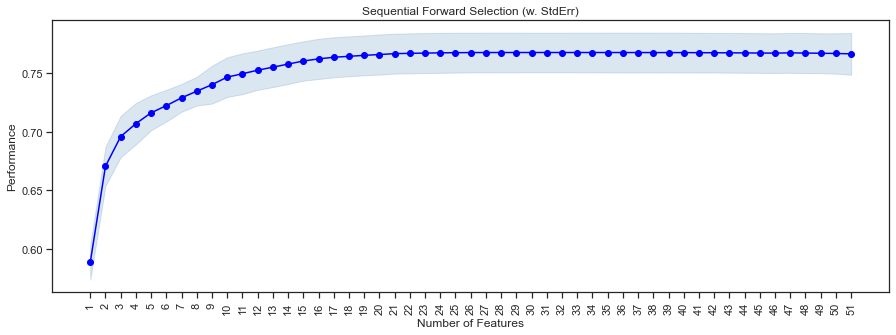

<IPython.core.display.Javascript object>

In [80]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

In [81]:
reg = LinearRegression()

# # Build step forward feature selection
sfs = SFS(
    reg,
    k_features=30,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  51 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.4s finished

[2021-09-18 09:14:23] Features: 1/30 -- score: 0.5887754125276332[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished

[2021-09-18 09:14:23] Features: 2/30 -- score: 0.6704812828521951[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  49 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    0.3s finished

[2021-09-18 09:14:24] Features: 3/30 -- score: 0.6957300054970739[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.3s finished

[2021-09-18 09:14:24] Features: 4/30 -- score: 0.70

<IPython.core.display.Javascript object>

In [82]:
# Let us select features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 2, 3, 5, 6, 7, 8, 10, 11, 13, 14, 15, 17, 18, 23, 25, 27, 29, 30, 31, 32, 34, 37, 38, 39, 40, 41, 44, 48, 50]


<IPython.core.display.Javascript object>

In [83]:
x_train.columns[feat_cols]

Index(['Year', 'Engine', 'Power', 'Kilometers_Driven_log',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Name_Manufacturer_Audi', 'Name_Manufacturer_Bmw',
       'Name_Manufacturer_Datsun', 'Name_Manufacturer_Force',
       'Name_Manufacturer_Ford', 'Name_Manufacturer_Honda',
       'Name_Manufacturer_Hyundai', 'Name_Manufacturer_Jaguar',
       'Name_Manufacturer_Land Rover', 'Name_Manufacturer_Mahindra',
       'Name_Manufacturer_Maruti', 'Name_Manufacturer_Mercedes-Benz',
       'Name_Manufacturer_Mini Cooper', 'Name_Manufacturer_Porsche',
       'Name_Manufacturer_Toyota', 'Name_Manufacturer_Volvo'],
      dtype='object')

<IPython.core.display.Javascript object>

### Now we will fit an sklearn model using these features only

In [84]:
x_train_final = x_train[x_train.columns[feat_cols]]

<IPython.core.display.Javascript object>

In [85]:
# Creating new x_test with the same variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]

<IPython.core.display.Javascript object>

In [86]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_),
    index=x_train_final.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
print(coef_df)

                                 Coefficients
Year                                 0.865216
Engine                               0.003165
Power                                0.080253
Kilometers_Driven_log               -1.594057
Location_Bangalore                   2.624458
Location_Chennai                     1.658551
Location_Coimbatore                  2.468494
Location_Hyderabad                   2.508692
Location_Jaipur                      1.282424
Location_Kolkata                    -0.903521
Location_Mumbai                     -0.596992
Location_Pune                        0.961090
Fuel_Type_LPG                        1.847788
Fuel_Type_Petrol                    -0.775492
Name_Manufacturer_Audi               9.658971
Name_Manufacturer_Bmw                8.143745
Name_Manufacturer_Datsun            -1.522163
Name_Manufacturer_Force             -2.446367
Name_Manufacturer_Ford               0.799040
Name_Manufacturer_Honda             -0.273715
Name_Manufacturer_Hyundai         

<IPython.core.display.Javascript object>

In [87]:
# model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model2, x_train_final, y_train))

# model performance on test set
print("\n\nTest Performance\n")
print(model_perf(lin_reg_model2, x_test_final, y_test))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  5.463924  2.995606  0.771913      0.770244


Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  4.987193  2.864072  0.783067      0.779327


<IPython.core.display.Javascript object>

**Observations**

- The train and test $R^2$ are 0.77 and 0.78, indicating that the model explains 77% and 78% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- Independent variables reduced and performance still same.

## Recommendations

* Increase of Year with reduce the price
* More Kilometers_Driven will reduce the price of car
* Bangalore, Chennai, Coimbatore, Hyderabad, Jaipur give more price and Kolkata, Mumbai will give less price
* Jaguar, Land Rover, Mercedes-Benz, Mini Cooper, Porsche, Audi, Bmw giving good price
* LPG type car has good value
* Increase Power will reduce price